<a href="https://colab.research.google.com/github/TharikH/deep-learning/blob/main/dl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import copy
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=ced363fbd0e8b68f55ba2928a9013ccc74b9287623f14927070e71a8db6700a1
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
num_train_samples = X_train.shape[0]
num_size = X_train.shape[1] * X_train.shape[2]
num_test_samples = X_test.shape[0]

In [4]:
num_size

784

plot 1 sample image for each class

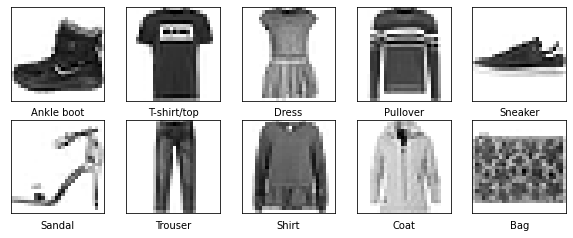

In [5]:
d=set()
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
k=0
for i in range(num_train_samples):
  if Y_train[i] not in d:
    d.add(Y_train[i])
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
    k+=1
    if k == 10:
      break

plt.show()


In [6]:
#parameters 



In [31]:
#class having all required activations

class Activations():
  def __init__(self):
    self.activation_dict={
        "sigmoid":self.sigmoid,
        "softmax":self.softmax,
        "tanh":self.tanh,
        "relu":self.relu
    }
    self.derivative_dict={
        "sigmoid":self.sigmoidDerivative,
        "softmax":self.softmaxDerivative,
        "tanh":self.tanhDerivative,
        "relu":self.reluDerivative
    }

  def activate(self, activation_function = "sigmoid"):
    return self.activation_dict[activation_function]

  def derivate(self,activation_function = "sigmoid"):
    return self.derivative_dict[activation_function]

  def sigmoid(self, x):
    z = x.copy()
    z[x < 0] = np.exp(x[x < 0])/(1 + np.exp(x[x<0]))
    z[x >= 0] = 1/(1+np.exp(-x[x >= 0]))
    return z

  def softmax(self, x):
    max_element = np.max(x,axis=0)
    z = np.exp(x - max_element)
    total = sum(z)
    z = z/total
    return z
  
  def tanh(self, x):
    return np.tanh(x)

  def tanhDerivative(self, x):
    z = self.tanh(x)
    return 1 - z**2

  def softmaxDerivative(self,x):
    pass
  
  def sigmoidDerivative(self,x):
    z = self.sigmoid(x)
    return  z*(1 - z)
  
  def relu(self,x):
    return np.maximum(x,0)
  
  def reluDerivative(self,x):
    z = x.copy()
    z[x < 0]=0
    z[x > 0]=1
    return z

In [32]:
# class having all losses and its derivatives
class Loss():
  def __init__(self):
    pass
  def crossEntropy(self ,Y_hat, Y):
    loss=0
    num_samples = Y_hat.shape[1]
    for i in range(num_samples):
      loss+=np.log(Y_hat[:,i][Y[i]] if Y_hat[:,i][Y[i]] != 0 else 1e-5)

    return -loss/num_samples

  def findOneHotVector(self,Y_hat, Y):
    vector = np.zeros(Y_hat.shape)
    for i in range(Y_hat.shape[1]):
      vector[:,i][Y[i]] = 1
    
    return vector



  def crossEntropyDerivative(self,Y_hat, Y):
    derivative = np.zeros(Y_hat.shape)
    for i in range(Y_hat.shape[1]):
      derivative[:,i][Y[i]] = 1/(Y_hat[:,i][Y[i]])
    return derivative
    

In [33]:
# class having all the weight initializations
class WeightInit():
  def __init__(self,weight_name):
    self.weight_name = weight_name
    self.weight_dict={
        "zero":self.zeroInit,
        "random":self.randomInit,
        "xavier":self.xavierInit
    }

  def initializeWeight(self):
    return self.weight_dict[self.weight_name]
    
  
  def zeroInit(self, shape, flag=0):
    x = np.zeros(shape)
    return x

  def randomInit(self, shape, flag=0):
    x = np.random.normal(loc=0,scale=1,size=shape)
    return x

  
  def xavierInit(self, shape, flag=0):
    x = np.random.randn(*shape) * np.sqrt(2/shape[0]) if flag == 0 else self.zeroInit(shape)
    return x

  


In [34]:
# Base class for all neural networks

class NeuralNetwork():
  def __init__(self):
    pass
  def getParameters(self):
    pass
  def feedforward():
    pass
  def backpropogation():
    pass
  def test(self):
    pass
  def train(self):
    pass


In [35]:



# classes having all the optimizers
class Optimizer():
  def __init__(self,optimizer_name="gd"):
    self.optimizer_name = optimizer_name
    self.history = 0
    self.optimizer_dict={
        "gd":self.gradient_descent,
        "sgd":self.gradient_descent,
        "momentum":self.momentum,
        "nesterov":self.nesterov,
        "rmsprop":self.rmsprop,
        "adam" : self.adam,
        "nadam" : self.nadam
    }

  def optimize(self):
    return self.optimizer_dict[self.optimizer_name]
    
  
  def gradient_descent(self, nn, X, Y, X_val, Y_val, loss, lr, epochs, batch_size,indexes_for_batch,parameter = 0, weight_decay = 0):

    num_data = X.shape[1]

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]

        # self.W,self.b = self.initializeWeights()
        a_values,h_values = nn.forwardpropogation(X_batch)
        delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
        # print(np.sum(delta_W[0], axis = 0))
        for j in range(nn.num_hidden_layer + 1):
          nn.W[j] = nn.W[j] - lr * delta_W[nn.num_hidden_layer - j] - lr*weight_decay*nn.W[j]
          nn.b[j] = nn.b[j] - lr * delta_b[nn.num_hidden_layer - j] - lr*weight_decay*nn.b[j]

      # Y_hat = nn.feedforward(X)
      # loss_value = loss.crossEntropy(Y_hat,Y)
      # print(f"epoch: {epoch} => loss = {loss_value}")
      y_val_predict = nn.feedforward(X_val)
      y_train_predict = nn.feedforward(X)

      validation_loss = loss.crossEntropy(y_val_predict,Y_val)
      training_loss = loss.crossEntropy(y_train_predict,Y)

      validation_accuracy = nn.calculateAccuracy(X_valid, Y_val)
      training_accuracy = nn.calculateAccuracy(X, Y)

      
      wandb.log({'validation_loss': validation_loss,
                'training_loss': training_loss,
                'validation_accuracy': validation_accuracy,
                'training_accuracy': training_accuracy
                })

  def momentum(self, nn, X, Y, X_val, Y_val, loss, lr, epochs, batch_size,indexes_for_batch,parameter = 0.9, weight_decay = 0):
    num_data = X.shape[1]
    ut_w,ut_b = nn.initializeWeights("zero")
    beta = parameter

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]

        # self.W,self.b = self.initializeWeights()
        a_values,h_values = nn.forwardpropogation(X_batch)
        delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
        # print(np.sum(delta_W[0], axis = 0))
        for j in range(nn.num_hidden_layer + 1):
          ut_w[j] = beta*ut_w[j] + delta_W[nn.num_hidden_layer - j]
          ut_b[j] = beta*ut_b[j] + delta_b[nn.num_hidden_layer - j] 

          nn.W[j] = nn.W[j] - lr * ut_w[j] - lr*weight_decay*nn.W[j]
          nn.b[j] = nn.b[j] - lr * ut_b[j] - lr*weight_decay*nn.b[j]

      # Y_hat = nn.feedforward(X)
      # loss_value = loss.crossEntropy(Y_hat,Y)
      # print(f"epoch: {epoch} => loss = {loss_value}")
      y_val_predict = nn.feedforward(X_val)
      y_train_predict = nn.feedforward(X)

      validation_loss = loss.crossEntropy(y_val_predict,Y_val)
      training_loss = loss.crossEntropy(y_train_predict,Y)

      validation_accuracy = nn.calculateAccuracy(X_valid, Y_val)
      training_accuracy = nn.calculateAccuracy(X, Y)

      
      wandb.log({'validation_loss': validation_loss,
                'training_loss': training_loss,
                'validation_accuracy': validation_accuracy,
                'training_accuracy': training_accuracy
                })


  def nesterov(self, nn, X, Y, X_val, Y_val, loss, lr, epochs, batch_size,indexes_for_batch,parameter = 0.9, weight_decay = 0):
    num_data = X.shape[1]
    ut_w,ut_b = nn.initializeWeights("zero")
    beta = parameter


    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]
  
        # self.W,self.b = self.initializeWeights()
        a_values,h_values = nn.forwardpropogation(X_batch)

        old_W = copy.deepcopy(nn.W)
        old_b = copy.deepcopy(nn.b)
        
        for k in range(nn.num_hidden_layer + 1):
          nn.W[k] = nn.W[k] - beta *  ut_w[k]
          nn.b[k] = nn.b[k] - beta *  ut_b[k]

        
        delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
        # print(np.sum(delta_W[0], axis = 0))
        for j in range(nn.num_hidden_layer + 1):
          ut_w[j] = beta*ut_w[j] + delta_W[nn.num_hidden_layer - j]
          ut_b[j] = beta*ut_b[j] + delta_b[nn.num_hidden_layer - j] 

          nn.W[j] = old_W[j] - lr * ut_w[j]
          nn.b[j] = old_b[j] - lr * ut_b[j]

      # Y_hat = nn.feedforward(X)
      # loss_value = loss.crossEntropy(Y_hat,Y)
      # print(f"epoch: {epoch} => loss = {loss_value}")
      y_val_predict = nn.feedforward(X_val)
      y_train_predict = nn.feedforward(X)

      validation_loss = loss.crossEntropy(y_val_predict,Y_val)
      training_loss = loss.crossEntropy(y_train_predict,Y)

      validation_accuracy = nn.calculateAccuracy(X_valid, Y_val)
      training_accuracy = nn.calculateAccuracy(X, Y)

      
      wandb.log({'validation_loss': validation_loss,
                'training_loss': training_loss,
                'validation_accuracy': validation_accuracy,
                'training_accuracy': training_accuracy
                })
    


  def rmsprop(self, nn, X, Y,X_val, Y_val, loss, lr, epochs, batch_size,indexes_for_batch,parameter = 0.9,epsilon = 0.1, weight_decay = 0):
    num_data = X.shape[1]
    vt_w,vt_b = nn.initializeWeights("zero")
    beta = parameter

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]

        # self.W,self.b = self.initializeWeights()
        a_values,h_values = nn.forwardpropogation(X_batch)
        delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
        # print(np.sum(delta_W[0], axis = 0))
        for j in range(nn.num_hidden_layer + 1):
          vt_w[j] = beta*vt_w[j] + (1 - beta) * np.multiply(delta_W[nn.num_hidden_layer - j],delta_W[nn.num_hidden_layer - j]) 
          vt_b[j] = beta*vt_b[j] + (1 - beta) * np.multiply(delta_b[nn.num_hidden_layer - j],delta_b[nn.num_hidden_layer - j])

          nn.W[j] = nn.W[j] - np.divide(lr * delta_W[nn.num_hidden_layer - j],np.sqrt(vt_w[j] + epsilon))
          nn.b[j] = nn.b[j] - np.divide(lr * delta_b[nn.num_hidden_layer - j],np.sqrt(vt_b[j] + epsilon))

      # Y_hat = nn.feedforward(X)
      # loss_value = loss.crossEntropy(Y_hat,Y)
      # print(f"epoch: {epoch} => loss = {loss_value}")
      y_val_predict = nn.feedforward(X_val)
      y_train_predict = nn.feedforward(X)

      validation_loss = loss.crossEntropy(y_val_predict,Y_val)
      training_loss = loss.crossEntropy(y_train_predict,Y)

      validation_accuracy = nn.calculateAccuracy(X_valid, Y_val)
      training_accuracy = nn.calculateAccuracy(X, Y)

      
      wandb.log({'validation_loss': validation_loss,
                'training_loss': training_loss,
                'validation_accuracy': validation_accuracy,
                'training_accuracy': training_accuracy
                })
    
  def adam(self, nn, X, Y, X_val, Y_val, loss, lr, epochs, batch_size,indexes_for_batch,parameter = 0.9,epsilon = 0.1, parameter2 = 0.999, weight_decay = 0):
    num_data = X.shape[1]
    vt_w,vt_b = nn.initializeWeights("zero")
    mt_w,mt_b = nn.initializeWeights("zero")
    beta1 = parameter
    beta2 = parameter2
    t=0

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        t+=1
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]

        # self.W,self.b = self.initializeWeights()
        a_values,h_values = nn.forwardpropogation(X_batch)
        delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
        # print(np.sum(delta_W[0], axis = 0))
        for j in range(nn.num_hidden_layer + 1):
          mt_w[j] = beta1 * mt_w[j] + (1 - beta1) * delta_W[nn.num_hidden_layer - j]
          mt_b[j] = beta1 * mt_b[j] + (1 - beta1) * delta_b[nn.num_hidden_layer - j]

          mt_w_dash = mt_w[j] / (1 - beta1 ** t)
          mt_b_dash = mt_b[j] / (1 - beta1 ** t)


          vt_w[j] = beta2*vt_w[j] + (1 - beta2) * np.multiply(delta_W[nn.num_hidden_layer - j],delta_W[nn.num_hidden_layer - j]) 
          vt_b[j] = beta2*vt_b[j] + (1 - beta2) * np.multiply(delta_b[nn.num_hidden_layer - j],delta_b[nn.num_hidden_layer - j])

          vt_w_dash = vt_w[j] / (1 - beta2 ** t)
          vt_b_dash = vt_b[j] / (1 - beta2 ** t)           

          nn.W[j] = nn.W[j] - np.divide(lr * mt_w_dash,np.sqrt(vt_w_dash + epsilon)) - lr*weight_decay*nn.W[j]
          nn.b[j] = nn.b[j] - np.divide(lr * mt_b_dash,np.sqrt(vt_b_dash + epsilon)) - lr*weight_decay*nn.b[j]

      # Y_hat = nn.feedforward(X)
      # loss_value = loss.crossEntropy(Y_hat,Y)
      # print(f"epoch: {epoch} => loss = {loss_value}")
      y_val_predict = nn.feedforward(X_val)
      y_train_predict = nn.feedforward(X)

      validation_loss = loss.crossEntropy(y_val_predict,Y_val)
      training_loss = loss.crossEntropy(y_train_predict,Y)

      validation_accuracy = nn.calculateAccuracy(X_valid, Y_val)
      training_accuracy = nn.calculateAccuracy(X, Y)

      
      wandb.log({'validation_loss': validation_loss,
                'training_loss': training_loss,
                'validation_accuracy': validation_accuracy,
                'training_accuracy': training_accuracy
                })
    
  def nadam(self, nn, X, Y,X_val, Y_val, loss, lr, epochs, batch_size,indexes_for_batch,parameter = 0.9,epsilon = 0.1, parameter2 = 0.999, weight_decay = 0):
    num_data = X.shape[1]
    vt_w,vt_b = nn.initializeWeights("zero")
    mt_w,mt_b = nn.initializeWeights("zero")
    beta1 = parameter
    beta2 = parameter2
    t=0

    for epoch in range(epochs):
      for batch in range(0,num_data,batch_size):
        t+=1
        X_batch = X[:,indexes_for_batch[batch:batch + batch_size]]
        Y_batch = Y[indexes_for_batch[batch:batch + batch_size]]

        # self.W,self.b = self.initializeWeights()
        a_values,h_values = nn.forwardpropogation(X_batch)
        delta_W, delta_b = nn.backpropogation(X_batch,Y_batch,a_values, h_values, loss)
        # print(np.sum(delta_W[0], axis = 0))
        for j in range(nn.num_hidden_layer + 1):
          mt_w[j] = beta1 * mt_w[j] + (1 - beta1) * delta_W[nn.num_hidden_layer - j]
          mt_b[j] = beta1 * mt_b[j] + (1 - beta1) * delta_b[nn.num_hidden_layer - j]

          mt_w_dash = mt_w[j] / (1 - beta1 ** t)
          mt_b_dash = mt_b[j] / (1 - beta1 ** t)


          vt_w[j] = beta2*vt_w[j] + (1 - beta2) * np.multiply(delta_W[nn.num_hidden_layer - j],delta_W[nn.num_hidden_layer - j]) 
          vt_b[j] = beta2*vt_b[j] + (1 - beta2) * np.multiply(delta_b[nn.num_hidden_layer - j],delta_b[nn.num_hidden_layer - j])

          vt_w_dash = vt_w[j] / (1 - beta2 ** t)
          vt_b_dash = vt_b[j] / (1 - beta2 ** t)           

          w_update_numerator = lr * (beta1 * mt_w_dash + ((1 - beta1)* delta_W[nn.num_hidden_layer - j]/(1 - beta1 ** t)))
          b_update_numerator = lr * (beta1 * mt_b_dash + ((1 - beta1)* delta_b[nn.num_hidden_layer - j]/(1 - beta1 ** t)))

          nn.W[j] = nn.W[j] - np.divide(w_update_numerator,np.sqrt(vt_w_dash + epsilon)) - lr*weight_decay*nn.W[j]
          nn.b[j] = nn.b[j] - np.divide(b_update_numerator,np.sqrt(vt_b_dash + epsilon)) - lr*weight_decay*nn.b[j]

      # Y_hat = nn.feedforward(X)
      # loss_value = loss.crossEntropy(Y_hat,Y)
      # print(f"epoch: {epoch} => loss = {loss_value}")
      y_val_predict = nn.feedforward(X_val)
      y_train_predict = nn.feedforward(X)

      validation_loss = loss.crossEntropy(y_val_predict,Y_val)
      training_loss = loss.crossEntropy(y_train_predict,Y)

      validation_accuracy = nn.calculateAccuracy(X_valid, Y_val)
      training_accuracy = nn.calculateAccuracy(X, Y)

      
      wandb.log({'validation_loss': validation_loss,
                'training_loss': training_loss,
                'validation_accuracy': validation_accuracy,
                'training_accuracy': training_accuracy
                })
    

In [36]:
# Neural Network for this particular neural network

class NN(NeuralNetwork):
  def __init__(self, num_samples = 60000, input_size = 784, output_size = 10, num_hidden_layer = 3, hidden_layer_size=np.array([64,64,64]), data_name = "Fashion_mnsit", hidden_layer_activation="relu", output_layer_activation="softmax", weight_name="xavier"):
    self.num_samples = num_samples
    self.input_size = input_size
    self.output_size = output_size
    self.num_hidden_layer = num_hidden_layer
    self.hidden_layer_size = hidden_layer_size
    self.W, self.b = self.initializeWeights(weight_name)
    self.hidden_layer_activation = hidden_layer_activation
    self.output_layer_activation = output_layer_activation
    self.activation_function = Activations()
    self.activate_hidden = self.activation_function.activate(hidden_layer_activation)
    self.activate_hidden_derivative = self.activation_function.derivate(hidden_layer_activation)
    self.activate_output = self.activation_function.activate(output_layer_activation)
    self.parameters = {
        "data_name":data_name,
        "num_samples":num_samples,
        "input_size":input_size,
        "output_size":output_size,
        "num_hidden_layer":num_hidden_layer,
        "hidden_layer_size":hidden_layer_size,
        "hidden_layer_activation":hidden_layer_activation,
        "output_layer_activation":output_layer_activation,
        "weight_init":weight_name
    }

  def getParameters(self):
    return self.parameters

  def initializeWeights(self, weight_name):
    W = []
    b= []
    input_size = self.input_size
    weight_init = WeightInit(weight_name).initializeWeight()
    for i in range(self.num_hidden_layer):
      output_size = self.hidden_layer_size[i]
      W.append(weight_init((input_size, output_size ),0))
      b.append(weight_init((output_size, 1 ),1))
      input_size = output_size
    
    output_size = self.output_size

    W.append(weight_init((input_size, output_size),0))
    b.append(weight_init((output_size, 1),1))

    return W, b

  def calculateAccuracy(self, X, Y):
    Y_hat = self.feedforward(X)
    size = Y_hat.shape[1]
    score=0
    for i in range(size):
      if(np.argmax(Y_hat[:,i]) ==  Y[i]):
          score+=1

    return score/size * 100

  def feedforward(self, X):
    a = self.W[0].T @ X + self.b[0]
    hidden_layer_input = self.activate_hidden(a)

    for i in range(1,self.num_hidden_layer):
      a=self.W[i].T @ hidden_layer_input + self.b[i]
      hidden_layer_output=self.activate_hidden(a)
      hidden_layer_input = hidden_layer_output

    a=self.W[self.num_hidden_layer].T @ hidden_layer_input + self.b[self.num_hidden_layer]
    output = self.activate_output(a)

    return output


  def forwardpropogation(self, X):
    a_values=[]
    h_values=[]

    a = self.W[0].T @ X + self.b[0]
    hidden_layer_input = self.activate_hidden(a)
    
    a_values.append(a)
    h_values.append(hidden_layer_input)

    for i in range(1,self.num_hidden_layer):
      a=self.W[i].T @ hidden_layer_input + self.b[i]
      hidden_layer_output=self.activate_hidden(a)
      hidden_layer_input = hidden_layer_output
      a_values.append(a)
      h_values.append(hidden_layer_input)

    a=self.W[self.num_hidden_layer].T @ hidden_layer_input + self.b[self.num_hidden_layer]
    output = self.activate_output(a)
    a_values.append(a)
    h_values.append(output)

    return a_values,h_values

  def backpropogation(self, X, Y, a_values, h_values, loss):
    size = len(h_values)
    data_size = Y.shape[0]
    delta_ak = -(loss.findOneHotVector(h_values[size - 1],Y) - h_values[size - 1])
    delta_W=[]
    delta_b=[]

    for k in range(size - 1,0,-1):
      delta_wk = h_values[k-1] @ delta_ak.T
      delta_bk = np.sum(delta_ak,axis=1)
      delta_W.append(delta_wk/data_size)
      delta_b.append(delta_bk.reshape(delta_bk.shape[0],1)/data_size)

      delta_hk = self.W[k] @ delta_ak
      # print(delta_hk.shape)
      # print(self.activation_function.sigmoidDerivative(a_values[k-1]).shape)
      delta_ak = np.multiply(self.activate_hidden_derivative(a_values[k-1]),delta_hk)

    delta_wk = X @ delta_ak.T
    delta_bk = np.sum(delta_ak,axis=1)
    delta_W.append(delta_wk/data_size)
    delta_b.append(delta_bk.reshape(delta_bk.shape[0],1)/data_size)

    return delta_W,delta_b
  
  def training(self, X, Y, X_val, Y_val,loss = Loss() ,epochs = 10 , weight_decay = 0 ,optimizer_name="gd", lr=0.01, batch_size=32,parameter=0.9):
    optimize = Optimizer(optimizer_name).optimize()
    
    num_data = X.shape[1]
    np.random.seed(1)

    # Random shuffling of data
    indexes_for_batch = np.arange(num_data)
    np.random.shuffle(indexes_for_batch)

    optimize(self, X, Y, X_val, Y_val ,loss, lr, epochs, batch_size, indexes_for_batch,parameter=0.9, weight_decay=weight_decay)

    # print(f'train accuracy: {self.calculateAccuracy(X,Y)}')

In [37]:
# # Split data to train and validation (10% of data)
num_train_samples = 60000
num_validate_samples = num_train_samples//10
num_train_samples -= num_validate_samples

X_valid = X_train[:num_validate_samples,:].reshape(num_validate_samples,num_size).T /255.0
Y_valid = Y_train[:num_validate_samples]

X = X_train[num_validate_samples:,:].reshape(num_train_samples,num_size).T / 255.0
Y = Y_train[num_validate_samples:]

def train():

  wandb.init()

  num_hidden_layer = wandb.config.batch_size
  hidden_layer_size = np.full(num_hidden_layer,wandb.config.hidden_size)
  hidden_layer_activation = wandb.config.activation
  weight_name = wandb.config.weight_init
  epochs = wandb.config.epochs
  weight_decay = wandb.config.weight_decay
  optimizer_name = wandb.config.optimizer
  lr = wandb.config.lr
  batch_size = wandb.config.batch_size

  wandb.run.name = f'hln_{num_hidden_layer}_hls_{wandb.config.hidden_size}_hla_{hidden_layer_activation}_winit_{weight_name}_ep_{epochs}_op_{optimizer_name}_lr_{lr}_bs_{batch_size}_wd_{weight_decay}'

  loss = Loss()
  nn = NN(num_samples = num_train_samples, num_hidden_layer = num_hidden_layer, hidden_layer_size = hidden_layer_size, hidden_layer_activation = hidden_layer_activation, weight_name = weight_name)
  nn.training(X, Y, X_valid, Y_valid, loss = loss, epochs = epochs, weight_decay = weight_decay, optimizer_name = optimizer_name,lr = lr, batch_size = batch_size)


  y_val_predict = nn.feedforward(X_valid)
  y_train_predict = nn.feedforward(X)

  validation_loss = loss.crossEntropy(y_val_predict,Y_valid)
  training_loss = loss.crossEntropy(y_train_predict,Y)

  validation_accuracy = nn.calculateAccuracy(X_valid, Y_valid)
  training_accuracy = nn.calculateAccuracy(X, Y)

  
  # wandb.log({'validation_loss': validation_loss,
  #            'training_loss': training_loss,
  #            'validation_accuracy': validation_accuracy,
  #            'training_accuracy': training_accuracy
  #            })



In [38]:
sweep_configuration = {
    'method': 'random',
    'name': 'demo-project',
    'metric': {
        'goal': 'minimize', 
        'name': 'validation_loss'
        },
    'parameters': {
        'batch_size': {'values': [16, 32, 64]},
        'epochs': {'values': [5, 10]},
        'num_hidden_layer':{'values' : [3, 4, 5]},
        'hidden_size': {'values' : [32, 64, 128]},
        'weight_decay': {'values' : [0, 0.0005, 0.5]},
        'lr': {'values' : [1e-3, 1e-4]},
        'optimizer':{'values' : ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'weight_init':{'values' : ['random','xavier']},
        'activation' : {'values' : ['sigmoid','tanh','relu']},
     }
}

wandb.login(key = 'c425b887e2c725018a7f3a772582610fa54ef52c')


sweep_id = wandb.sweep(sweep=sweep_configuration, project='demo-project')
wandb.agent(sweep_id, function=train, count=10)
wandb.finish()

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: wcvdojmr
Sweep URL: https://wandb.ai/cs22m058/demo-project/sweeps/wcvdojmr


wandb: Agent Starting Run: of4zam2x with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_size: 64
wandb: 	lr: 0.001
wandb: 	num_hidden_layer: 5
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


wandb: ERROR Error while calling W&B API: could not find agent a8w72rjr during agentHeartbeat (<Response [404]>)
Exception in thread Thread-95:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/lib/retry.py", line 131, in __call__
    result = self._call_fn(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/internal/internal_api.py", line 242, in execute
    return self.client.execute(*args, **kwargs)  # type: ignore
  File "/usr/local/lib/python3.9/dist-packages/wandb/vendor/gql-0.2.0/wandb_gql/client.py", line 52, in execute
    result = self._get_result(document, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/wandb/vendor/gql-0.2.0/wandb_gql/client.py", line 60, in _get_result
    return self.transport.execute(document, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/wandb/vendor/gql-0.2.0/wandb_gql/transport/requests.py", line 39, in execute
    request.raise_for_status()
  File "/usr/

training_accuracy,█▁▁▁
training_loss,▁███
validation_accuracy,█▁▁▁
validation_loss,▁███
training_accuracy,9.9963
training_loss,2.30403
validation_accuracy,10.03333
validation_loss,2.30477


In [ ]:
num_train_samples = 60000
num_validate_samples = num_train_samples//10
num_train_samples -= num_validate_samples

X_valid = X_train[:num_validate_samples,:].reshape(num_validate_samples,num_size).T /255.0
Y_valid = Y_train[:num_validate_samples]

X = X_train[num_validate_samples:,:].reshape(num_train_samples,num_size).T / 255.0
Y = Y_train[num_validate_samples:]

activation = 'relu'
batch_size=32
epochs=1
hidden_size= 32
lr= 0.0001
num_hidden_layer= 3
optimizer='momentum'
weight_decay=0
weight_init='random'

# nn = NN(hidden_layer_size=np.array([64,64,64,64]),num_hidden_layer=4)
# num_train_samples = 60000
# X = X_train[:num_train_samples,:].reshape(num_train_samples,num_size).T /255
# Y = Y_train[:num_train_samples]
# print(X.shape)
# nn.training(X,Y,batch_size=64,lr=0.0001,epochs=5,optimizer_name="nesterov");


nn = NN(num_samples = num_train_samples, num_hidden_layer = num_hidden_layer, hidden_layer_size = np.full(num_hidden_layer,hidden_size), hidden_layer_activation = activation, weight_name = weight_init)
nn.training(X, Y, epochs = epochs, weight_decay = weight_decay, optimizer_name = optimizer,lr = lr, batch_size = batch_size)
# print(np.full(num_hidden_layer,hidden_size))
# a = nn.feedforward(X)
# print(a,Y)

# print(a,Y)


epoch: 0 => loss = 2.913641820829864


In [ ]:
np.full(3,6)

array([6, 6, 6])

In [ ]:
a = np.ones((10,20))
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [ ]:
a[0][0]=10
a[0][4]=8
a[3][0] = 4
b

ValueError: ignored

In [ ]:
a=2
b=f'{a}{num_hidden_layer}'
b

'24'